## Least square

#### Take-aways

After studying this chapter, we will be able to

TBF


### Overview



#### Settings/Notation

Common settings

| symbol | setting |
|---|---|
| $m$ | a positive integer; number of observations; number of equations |
| $n$ | a positive integer; number of parameters; number of unknowns |
| $A$ | full rank $m$-by-$n$ matrix with $m \gg n$ (skinny matrix) |
| $b$ | (column) vector of length $m$ |
| $x$ | (column) vector of length $n$ |




#### Problem of interest

Given an over-determined (or inconsistent) system $Ax=b$, find the "best" $x$.


#### Why do we care?


- The "equality" conditions that $x$ should satisfy are only within some margin of errors (Sauer 2017)
  - Using aggregated data (hence too many conditions to satisfy) to determine a better solution. 
  - E.g.: Measurements of celestial bodies. In fact, predicting the orbit of an ateroid Ceres was at the heart of the invention of the method. ([Wikipedia page on history of least square](https://en.wikipedia.org/wiki/Least_squares#History))
- The least square method inspires many other statistical methods and signal processing.
  - Ridge regression, also known as Tikhonov regularization (LS + $\ell^2$ penalty)
  - LASSO (LS + $\ell^1$ penalty)
  - Elastic net (LS + $\ell^1$ penalty + $\ell^2$ penalty)

| | |
|---|---|
| ![determine an elliptical orbit using least square](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/X33-ellips-1.svg/1920px-X33-ellips-1.svg.png) <br> Figure: determine an elliptical orbit using least square (Wikipedia) | ![fitting parabola model with many data](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Linear_least_squares2.svg/1024px-Linear_least_squares2.svg.png) <br> Figure: fitting parabola model with many data (Wikipedia) |

### What we can do



#### Fitting data by least square

1. Choose a model $\longrightarrow$ dimension and meaning of $x$
2. Force the model to fit the data $\longrightarrow$ $Ax=b$ 
3. Solve the normal equation $\longrightarrow$ compute $x$ such that $A^T Ax = A^T b$
4. Diagnostics $\longrightarrow$ plots and statistics

#### Computation

**Example** 

Find the best line and best parabola for the four data points (−1, 1), (0, 0),
(1,0),(2,−2).

1. Decide a model
   - linear ($c_1 + c_2 t$)
   - parabola ($c_1 + c_2 t + c_3 t^2$)
2. Force the model to fit data
3. Solve normal equation

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# data points
data = np.array([[-1, 1], [0, 0], [1,0], [2, -2]], dtype=np.float64)

# number of data points/observations
m = data.shape[0]

# vector of unknowns (model 1)
n1 = 2
c1 = np.zeros(n1)

# matrix of least squares (model 1)
A1 = np.zeros((m, n1))
ones = np.ones(m)
A1 = np.column_stack((ones, data[:, 0]))

# vector of observations
b = data[:, 1]

# least squares solution (model 1 and 2)
c1 = np.linalg.solve(A1.T @ A1, A1.T @ b)

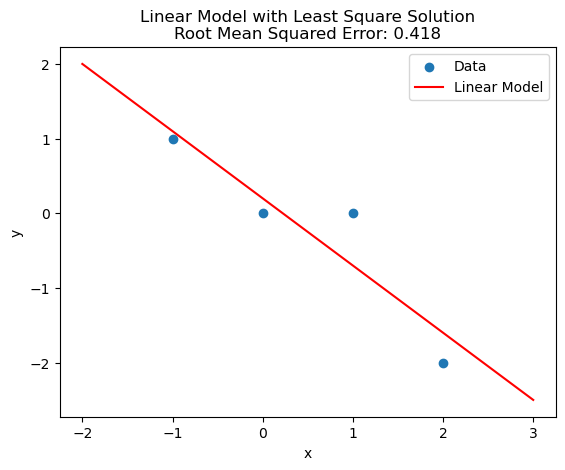

In [24]:
# AI usage: plotting is doen with copilot

# Calculate the predicted values
y_pred = c1[0] + c1[1] * data[:, 0]

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((data[:, 1] - y_pred)**2))

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], label='Data')

# Plot the linear model
x = np.linspace(-2, 3, 100)
y = c1[0] + c1[1] * x
plt.plot(x, y, color='red', label='Linear Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Linear Model with Least Square Solution\nRoot Mean Squared Error: {rmse:.3g}')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [25]:
# vector of unknowns (model 2)
n2 = 3
c2 = np.zeros(n2)

# matrix of least squares (model 2)
A2 = np.zeros((m, n2))
A2 = np.column_stack((ones, data[:, 0], data[:, 0]**2))

# least squares solution (model 2)
c2 = np.linalg.solve(A2.T @ A2, A2.T @ b)

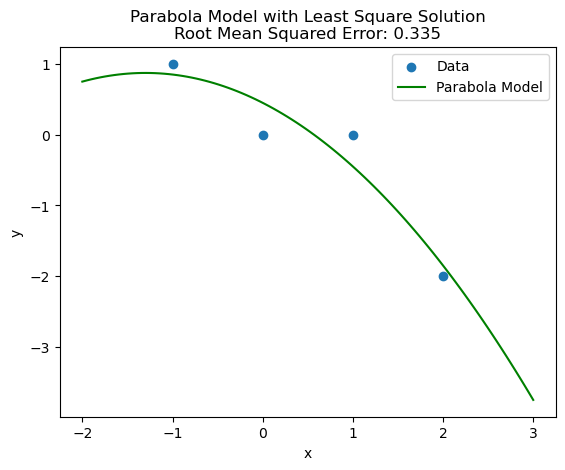

In [26]:
# AI usage: plotting is doen with copilot

# Calculate the predicted values
y_pred = c2[0] + c2[1] * data[:, 0] + c2[2] * data[:, 0]**2

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((data[:, 1] - y_pred)**2))

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], label='Data')

# Plot the parabola model
x = np.linspace(-2, 3, 100)
y = c2[0] + c2[1] * x + c2[2] * x**2
plt.plot(x, y, color='green', label='Parabola Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Parabola Model with Least Square Solution\nRoot Mean Squared Error: {rmse:.3g}')

# Show legend
plt.legend()

# Show the plot
plt.show()


### Why it works

#### Projection

**Example** 

Find "the best" solution to 
$$
\begin{aligned}
& x_1+x_2=2 \\
& x_1-x_2=1 \\
& x_1+x_2=3
\end{aligned} 
\Longleftrightarrow
\left[\begin{array}{rr}
1 & 1 \\
1 & -1 \\
1 & 1
\end{array}\right]\left[\begin{array}{l}
x_1 \\
x_2
\end{array}\right]=\left[\begin{array}{l}
2 \\
1 \\
3
\end{array}\right]
$$

**Idea 1**

Matrix muliplication $\Longleftrightarrow$ Linear combination of column vectors

$$
x_1\left[\begin{array}{l}
1 \\
1 \\
1
\end{array}\right]+x_2\left[\begin{array}{r}
1 \\
-1 \\
1
\end{array}\right]=\left[\begin{array}{l}
2 \\
1 \\
3
\end{array}\right]
$$

If $b$ were in the column space (i.e., some linear combination of columns equals $b$), it would have been solvable. But $b$ is outside the column space.

**Idea 2**

"The best" candidate for $x$ is the one that gives the **projection** of $b$ onto the column space.

![geometric intuition behind LS](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Linear_least_squares_geometric_interpretation.png/543px-Linear_least_squares_geometric_interpretation.png)

Figure: Geometric intuition behind Least Square method (Wikipedia)

Notation adjustments

- $\beta \gets x$
- $A \gets X$
- $y \gets b$

#### Normal equation

Let $\bar x$ be the vector of unknowns that gives the projection of $b$. Then, we have

$$
(b-A \bar{x}) \perp\left\{A x \mid x \in R^n\right\}
$$

which is equivalent to

$$
(A x)^T(b-A \bar{x})=0 \text { for all } x \text { in } R^n
$$

which is equivalent to

$$
x^T A^T(b-A \bar{x})=0 \text { for all } x \text { in } R^n
$$


**Normal equation**

$$
A^T A \bar{x}=A^T b
$$


#### Diagnostics



### What to be careful of

In [8]:
import numpy as np

# 1. Create A and b for a least square problem
A = np.arange(3*5, dtype=np.float64).reshape((3,5))**2
b = np.arange(5, dtype=np.float64).reshape((5,1))**2

# 2. Solve the least square problem using pseudo inverse
x = np.linalg.pinv(A.T)@b

# 3. Check the result
print(A.T)
print(b)
print(x)

# 4. Check the residual
res = A.T@x - b
print(res)

# 5. Check the residual for the true solution (cheating)
x_ = np.array([1,0,0]).reshape((3,1))
print(A.T@x_ - b)

[[  0.  25. 100.]
 [  1.  36. 121.]
 [  4.  49. 144.]
 [  9.  64. 169.]
 [ 16.  81. 196.]]
[[ 0.]
 [ 1.]
 [ 4.]
 [ 9.]
 [16.]]
[[1.00000000e+00]
 [0.00000000e+00]
 [1.66533454e-16]]
[[1.66533454e-14]
 [2.15383267e-14]
 [2.93098879e-14]
 [4.08562073e-14]
 [5.32907052e-14]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### What to be careful of?

### Appendix

##### Methods 

1. Least square

##### Important concepts


##### Important preliminary

- Projections (Linear algebra)
- Gradient of vector field (Vector calculus 1)

##### Summary

- (1st index matching requirement on $A$ and $b$) The number of rows of $A$ and the lenth of $b$ must match. 
- The number of columns of $A$ must match the length of the solution $x$.


> **Question**
>
> Remove squaring (`**2`) in the above and run the code. What happens? Can you explain why that happens? What does this example remind us of about the assumptions of the least square problem?
>
> (Reminder) This is **about atmosphere**, not getting it right.
> 
> 1. Think for a short time.
> 2. Share your guess with your pair.
> 3. Type your answer in clicker.
> 4. Feel free to say out loud.

##### Analysis


> **Question**
>
> TBF
>
> (Reminder) This is **about atmosphere**, not getting it right.
> 
> 1. Think for a short time.
> 2. Share your guess with your pair.
> 3. Type your answer in clicker.
> 4. Feel free to say out loud.

#### Method1 (TBC)

##### Method


##### Summary


##### Analysis


> **Question**
>
> TBF
>
> (Reminder) This is **about atmosphere**, not getting it right.
> 
> 1. Think for a short time.
> 2. Share your guess with your pair.
> 3. Type your answer in clicker.
> 4. Feel free to say out loud.

#### Method1 (TBC)

##### Method


##### Summary


##### Analysis


> **Question**
>
> TBF
>
> (Reminder) This is **about atmosphere**, not getting it right.
> 
> 1. Think for a short time.
> 2. Share your guess with your pair.
> 3. Type your answer in clicker.
> 4. Feel free to say out loud.

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)